In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,r2_score,f1_score,roc_curve,roc_auc_score,classification_report,precision_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\Completed\Random Forest\glass.xlsx",sheet_name='glass')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#  Exploratory Data Analysis (EDA)

## To saperate the Target and Features

In [6]:
Features = data.drop(columns='Type')
Target = data[['Type']]

In [7]:
print(Features.shape)
print(Target.shape)

(214, 9)
(214, 1)


#  Data Visualization

### Visuvalize the data for better understanding.

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>]], dtype=object)

<Figure size 1000x800 with 0 Axes>

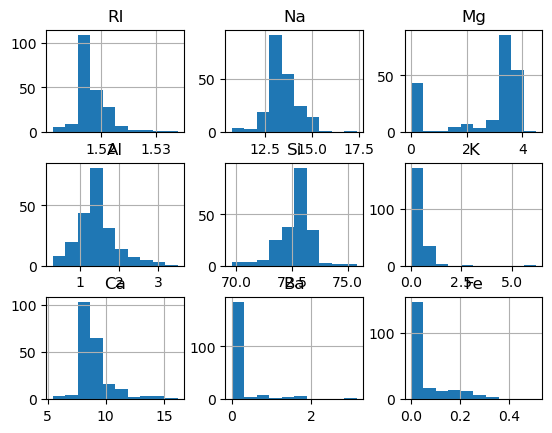

In [10]:
plt.figure(figsize=(10,8))
Features.hist()

<Axes: >

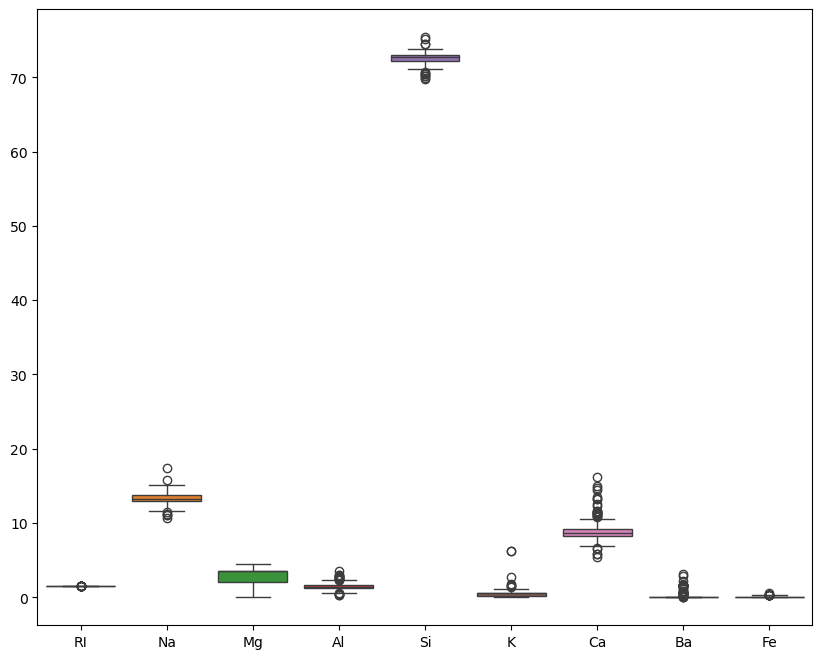

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(Features)

### -->The boxgraph tells about the outliers are available.

### Checking for the  missing values

In [14]:
Features.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

### --> While observing the above output there is no null values.

#  Data Preprocessing

## To apply the StandardScaler for the Numerical_columns

In [18]:
Std = StandardScaler()

In [19]:
features = pd.DataFrame(Std.fit_transform(Features))

## Rename for the features

In [21]:
old_name = range(0,9)
new_name = Features.columns
features = features.rename(columns=dict(zip(old_name,new_name)))
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


# Random Forest Model Implementation

### Dividing the data into train and test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(features,Target,train_size=0.8,random_state=50)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(171, 9)
(43, 9)
(171, 1)
(43, 1)


## Implement a Random Forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=50,max_samples=1.0)

In [30]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_samples=1.0, n_estimators=50)

In [31]:
Y_pred = rfc.predict(X_test)
Y_pred

array([1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 6, 7, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 7, 2, 2, 1, 2, 2, 3, 1, 5, 1, 2, 2, 7, 2, 2],
      dtype=int64)

In [32]:
accuracy_score(Y_test,Y_pred)

0.7441860465116279

## We got 83% accuracy our model is working good

In [34]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.69      0.75      0.72        12
           2       0.75      0.86      0.80        21
           3       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.74        43
   macro avg       0.74      0.62      0.65        43
weighted avg       0.75      0.74      0.73        43



## ---> The above output is tells about the precision,recall,f1-score

# Bagging and Boosting Methods

## Bagging method

In [38]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(estimator=rfc, n_estimators=100, random_state=42)

In [39]:
bagging_model.fit(X_train, Y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_samples=1.0,
                                                   n_estimators=50),
                  n_estimators=100, random_state=42)

In [40]:
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Accuracy:", accuracy_score(Y_test, y_pred_bagging))

Bagging Accuracy: 0.7674418604651163


## Boosting method

In [42]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(estimator=rfc, n_estimators=100, random_state=42)

In [43]:
adaboost_model.fit(X_train, Y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_samples=1.0,
                                                    n_estimators=50),
                   n_estimators=100, random_state=42)

In [44]:
y_pred_adaboost = adaboost_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(Y_test, y_pred_adaboost))

AdaBoost Accuracy: 0.7906976744186046


# Interview Questions:

### 1. Explain Bagging and Boosting methods. How is it different from each other

### 2. Explain how to handle imbalance in the data.